Word Frequency method for scoring - only on testing as there is no model behind it that needs to be trained

# Libraries

In [ ]:
!pip install rouge_score
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=05350c9197eb94a365d9d88f7acf796703c56b6b84b7e3f7056fa6cab60d0353
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
Successfully built rouge-score
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 505 kB/s 
     |████████████████████████████████| 451 kB 42.2 MB/s 
     |████████████████████████████████| 182 kB 50.0 MB/s 
     |████████████████████████████████| 132 kB 43.6 MB/s 
     |████████████████████████████████| 212 kB 52.5 MB/s 
     |████████████████████████████████| 127 kB 45.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
 import nltk
 import pandas as pd
 import numpy as np
 from nltk.corpus import stopwords
from rouge import Rouge
 from ast import literal_eval
 import re
 import math

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
def summarize(text, per):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

# Data

Due to time it takes, tensorflow data was downloaded and saved as csv for iteration process to take less time

In [ ]:
ds = load_dataset('cnn_dailymail', '3.0.0')

df = ds["test"]
print(df_test.shape)
df_validation = ds["validation"]
print(df_validation.shape)

(11490, 3)
(13368, 3)


In [ ]:
df["article"][0]


"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee.\xa0'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for sp

In [ ]:
df["highlights"][0]

'Experts question if  packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room than airlines offer .'

## EDA

In [ ]:
df["words_article"] = df["article"].apply(lambda n: len(n.split()))
df["words_summary"] = df["highlights"].apply(lambda n: len(n.split()))
df["summary_perc"] = df["words_summary"]/df["words_article"] 
df.describe()

,words_article,words_summary,summary_perc
count,11490.000000,11490.000000,11490.000000
mean,683.511575,55.009312,0.100302
std,348.402755,22.517857,0.094427
min,55.000000,9.000000,0.010490
25%,419.000000,40.000000,0.059573
50%,613.000000,51.000000,0.086348
75%,876.000000,64.000000,0.124399
max,1954.000000,564.000000,7.593750


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a1047dc90>,
      dtype=object)

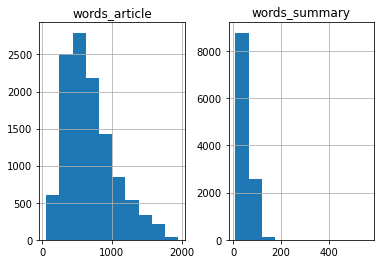

In [ ]:
df[["words_article", "words_summary"]].hist()

In [ ]:

from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
stop_words = set(stopwords.words('english'))

def word_freq_summary_p1(data):
  # Tokenizer and loweer case
  tokens_df =pd.DataFrame(data["article"].str.lower().map(word_tokenize)).rename(columns={"article":"words"})
  tokens_df["sentences"] =data["article"].str.lower().map(sent_tokenize)
  tokens_df["sentences"] = tokens_df["sentences"]
  # Remove stopwords and punctuation
  tokens_df["words"] = tokens_df["words"].apply(lambda word_tokens: [w for w in word_tokens if (not w in stop_words) & (not w in string.punctuation)])
  # Frequency
  tokens_df["freq_words"] = tokens_df["words"].apply(Counter)
  tokens_df["max_freq"] = tokens_df["freq_words"].apply(lambda x: max(x.values()))
  # Normalize
  tokens_df["freq_words"] = tokens_df["freq_words"].apply(lambda x: {key: value / max(x.values()) for key, value in x.items()})

  # Sum at sentence level 
  tokens_df["sentence_score"] = ""

  for i in range(tokens_df.shape[0]):
    sentence_score = []
    for sentence in tokens_df["sentences"][i]:
      sentence_score_temp = 0
      for word in word_tokenize(sentence): 
        if word in tokens_df["freq_words"][i].keys():
          sentence_score_temp += tokens_df["freq_words"][i][word]
      sentence_score.append(sentence_score_temp)
    tokens_df["sentence_score"][i] = sentence_score
  return tokens_df

def word_freq_summary_p2(tokens_df, per):
  # Get length 
  tokens_df["len"] = tokens_df["sentences"].apply(lambda x: int(len(x)*per))


  # Extract only the sentence that pass the threshold
  summary = []
  for row in tqdm(range(tokens_df.shape[0])):
    sentence_index = sorted(range(len(tokens_df["sentence_score"][row])), key=lambda i: tokens_df["sentence_score"][row][i])[-tokens_df["len"][row]:]
    temp_summary = [tokens_df["sentences"][row][id] for id in sentence_index] 
    temp_summary = ''.join(temp_summary)
    summary.append(temp_summary)
  tokens_df["summary"] = summary
  return tokens_df

# Hyperparameter tuning

In [ ]:
threshold_l = [0.05, 0.08 ,0.1, 0.15, 0.2]
y_validation = df_validation["highlights"]
df_validation_p = word_freq_summary_p1(df_validation)
# Select best threshold
list_rouge = []
import evaluate
for threshold in tqdm(threshold_l):
  df_validation_temp = word_freq_summary_p2(df_validation_p, threshold)
  y_pred = df_validation_temp["summary"]
  rouge_score = evaluate.load("rouge")
  dic_temp = rouge_score.compute(predictions=y_pred, references=y_validation)
  list_rouge.append(dic_temp)

print(list_rouge)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 5/5 [10:52<00:00, 130.57s/it]

[{'rouge1': 0.2655907509341321, 'rouge2': 0.09895722225125908, 'rougeL': 0.1668388277495951, 'rougeLsum': 0.2244826984366668}, {'rouge1': 0.29580852152881165, 'rouge2': 0.10670363715614013, 'rougeL': 0.18440882480694104, 'rougeLsum': 0.2483753127508878}, {'rouge1': 0.300752611154922, 'rouge2': 0.11003593370023235, 'rougeL': 0.18673099160998893, 'rougeLsum': 0.2519817482166945}, {'rouge1': 0.2942709675010338, 'rouge2': 0.11470370758501769, 'rougeL': 0.1810159597195628, 'rougeLsum': 0.24628758682458426}, {'rouge1': 0.2805986397957819, 'rouge2': 0.11684034337462963, 'rougeL': 0.17223450840107524, 'rougeLsum': 0.2352406122159019}]


In [ ]:
y_pred#.shape

0        sally forrest, an actress-dancer who graced th...
1        new leaf: politics teacher wang lian has drawn...
2        attack: murtaza torched his ex-girlfriend's fa...
3        although one of the most prominent royal rugby...
4        slater received a torrent of voicemails, rangi...
                               ...                        
13363    retailers will no longer have to apply for pla...
13364    fabian roncero, pictured winning the rotterdam...
13365    with that wednesday crumbled and henry made it...
13366    the twelfth floor of brown university's scienc...
13367    ms paniaras said that she and her partner were...
Name: summary, Length: 13368, dtype: object

In [ ]:
f1 = [d['rougeL'] for d in list_rouge]
print(f1)
per_max = threshold_l[np.argmax(f1)]
print("threshold:", per_max)

[0.1668388277495951, 0.18440882480694104, 0.18673099160998893, 0.1810159597195628, 0.17223450840107524]
threshold: 0.1


# Performance metrics

In [ ]:
y_test = df["highlights"]
df_p = word_freq_summary_p1(df)
df = word_freq_summary_p2(df_p, per_max)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 11490/11490 [00:02<00:00, 4467.99it/s]


In [ ]:
#y_test = df["highlights"]
y_pred = df["summary"]

In [ ]:
import evaluate
rouge_score = evaluate.load("rouge")
rouge_score.compute(predictions=y_pred, references=y_test)

# {'rouge1': 0.28260216325502197,
#  'rouge2': 0.0992591871443674,
#  'rougeL': 0.17708277682161608,
#  'rougeLsum': 0.23658299703315663}

{'rouge1': 0.2927382406245632,
 'rouge2': 0.10724996749138739,
 'rougeL': 0.18263510783401538,
 'rougeLsum': 0.24446360449643648}

In [ ]:
y_test[0]

'Experts question if  packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room than airlines offer .'

In [ ]:
y_pred[0]

'while united airlines has 30 inches of space, gulf air economy seats have between 29 and 32 inches, air asia offers 29 inches and spirit airlines offers just 28 inches.'